In [1]:
library(tidyverse)

── Attaching core tidyverse packages ─────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ───────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
data(economics_long)

In [5]:
summary(economics_long)
head(economics_long)
unique(economics_long$variable)

      date              variable             value             value01      
 Min.   :1967-07-01   Length:2870        Min.   :     2.2   Min.   :0.0000  
 1st Qu.:1979-06-01   Class :character   1st Qu.:     8.7   1st Qu.:0.1651  
 Median :1991-05-16   Mode  :character   Median :  3421.9   Median :0.3274  
 Mean   :1991-05-17                      Mean   : 53953.6   Mean   :0.3780  
 3rd Qu.:2003-05-01                      3rd Qu.: 10111.6   3rd Qu.:0.5591  
 Max.   :2015-04-01                      Max.   :320402.3   Max.   :1.0000  

date,variable,value,value01
<date>,<chr>,<dbl>,<dbl>
1967-07-01,pce,506.7,0.0000000000
1967-08-01,pce,509.8,0.0002652497
1967-09-01,pce,515.6,0.0007615234
1967-10-01,pce,512.2,0.0004706043
1967-11-01,pce,517.4,0.0009155394
1967-12-01,pce,525.1,0.0015743854


[1] "pce"      "pop"      "psavert"  "uempmed"  "unemploy"

In [6]:
economics_long <- economics_long %>% 
    mutate(
        variable = case_when(
            variable == '' ~ '',
            variable == 'pce' ~ 'Gastos consumo B$',
            variable == 'pop' ~ 'Población',
            variable == 'psavert' ~ 'Tasa de ahorro',
            variable == 'uempmed' ~ 'Duración media desempleo',
            variable == 'unemploy' ~ 'Desempleados'
        )
    )

head(economics_long, n = 10)

date,variable,value,value01
<date>,<chr>,<dbl>,<dbl>
1967-07-01,Gastos consumo B$,506.7,0.0000000000
1967-08-01,Gastos consumo B$,509.8,0.0002652497
1967-09-01,Gastos consumo B$,515.6,0.0007615234
1967-10-01,Gastos consumo B$,512.2,0.0004706043
1967-11-01,Gastos consumo B$,517.4,0.0009155394
1967-12-01,Gastos consumo B$,525.1,0.0015743854
1968-01-01,Gastos consumo B$,530.9,0.0020706591
1968-02-01,Gastos consumo B$,533.6,0.0023016831
1968-03-01,Gastos consumo B$,544.3,0.0032172224


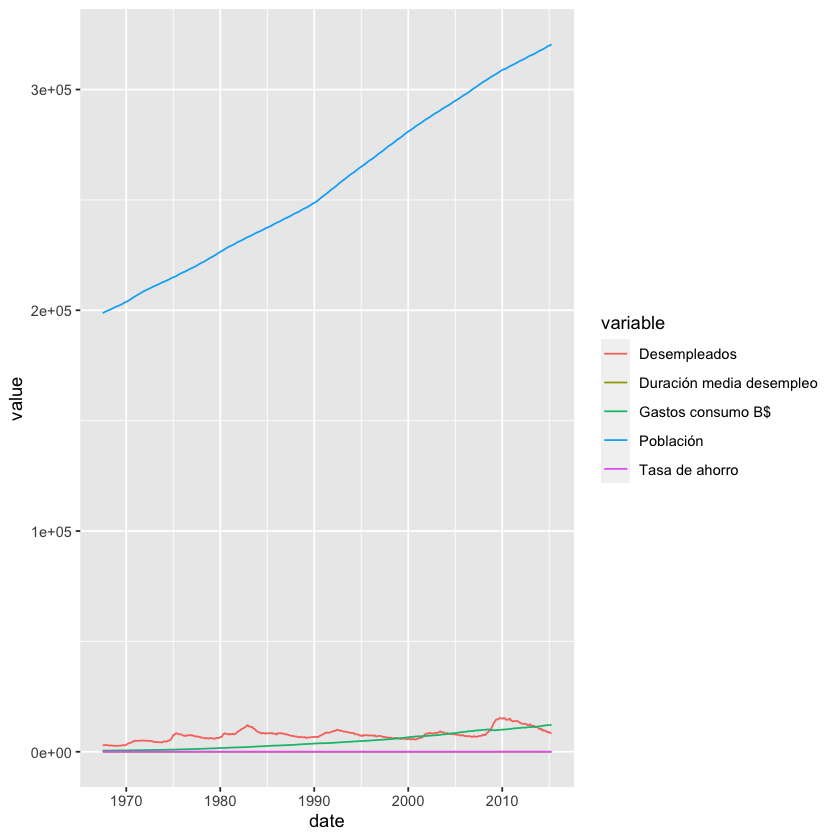

In [9]:
ggplot(economics_long) +
    aes(x = date, y = value, color = variable) +
    geom_line()

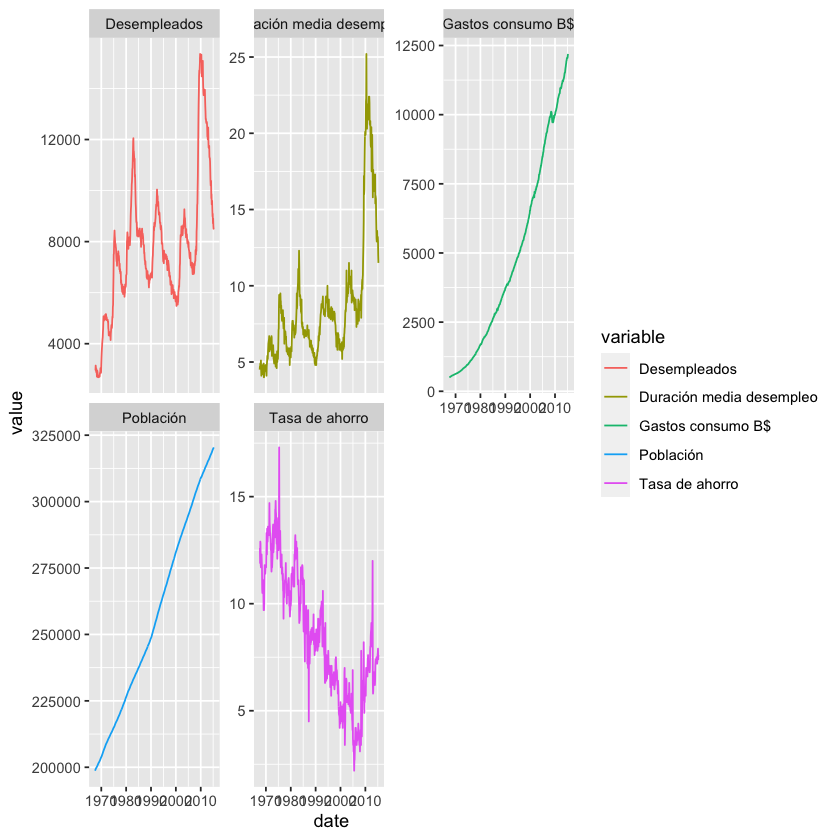

In [11]:
ggplot(economics_long) +
    aes(x = date, y = value, color = variable) +
    geom_line() +
    facet_wrap(vars(variable), scales = 'free_y')

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


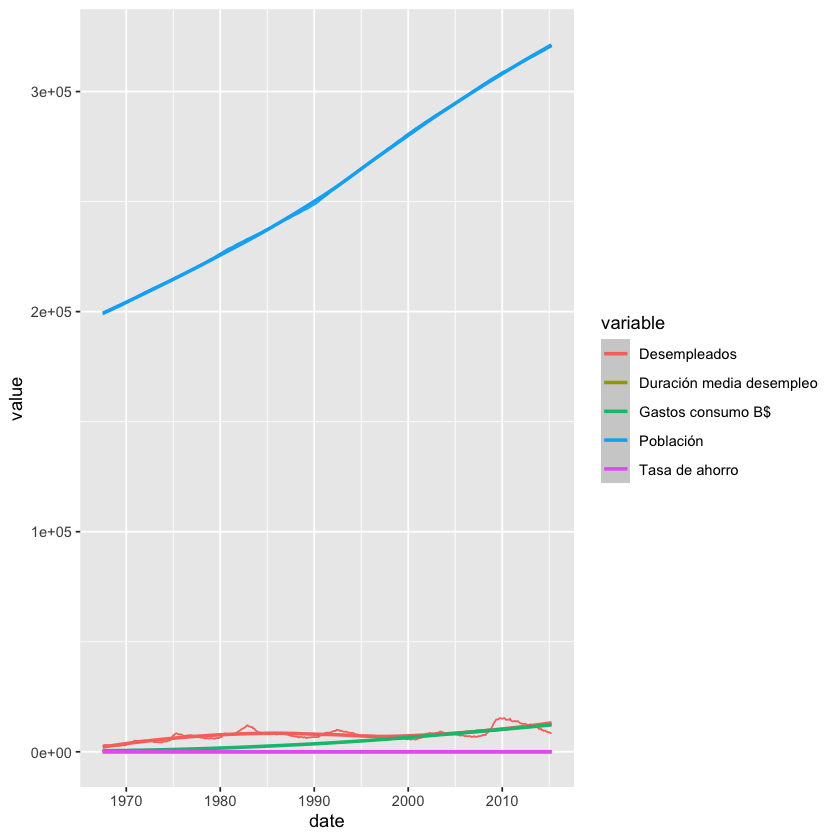

In [12]:
ggplot(economics_long) +
    aes(x = date, y = value, color = variable) +
    geom_line() +
    geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


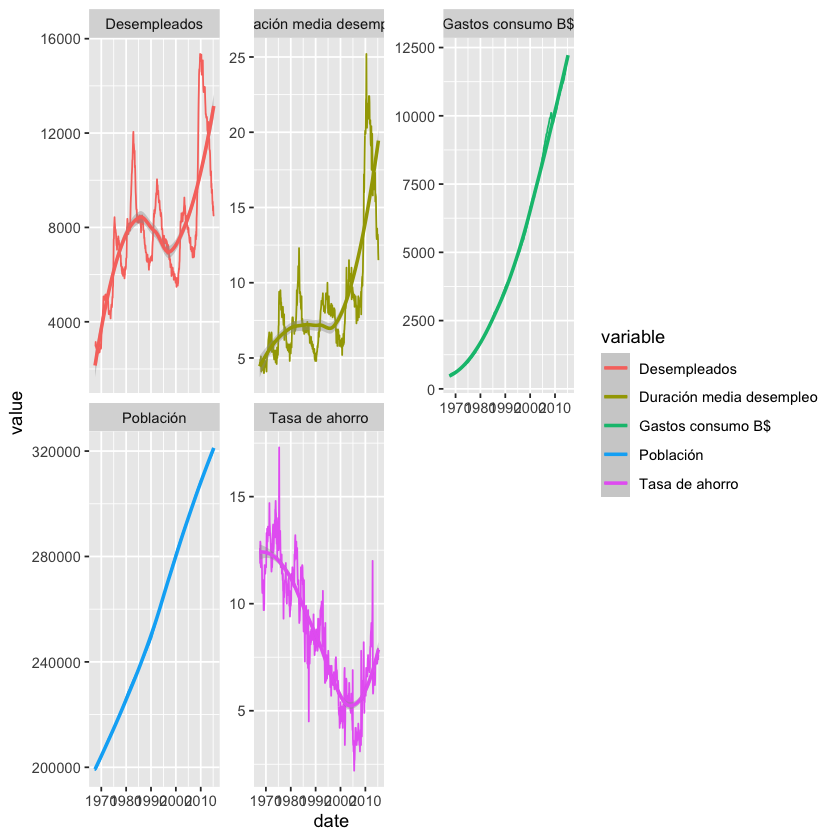

In [13]:
# Acá se nota mejor el aporte de geom_smooth()

ggplot(economics_long) +
    aes(x = date, y = value, color = variable) +
    geom_line() +
    geom_smooth() +
    facet_wrap(vars(variable), scales = 'free_y')

In [14]:
# install.packages('showtext')
library(showtext)

also installing the dependencies ‘sysfonts’, ‘showtextdb’





The downloaded binary packages are in
	/var/folders/r2/y9m75_w11cdbjpb1tfp78p3r0000gp/T//Rtmp1tQ9Mz/downloaded_packages


Loading required package: sysfonts

Loading required package: showtextdb



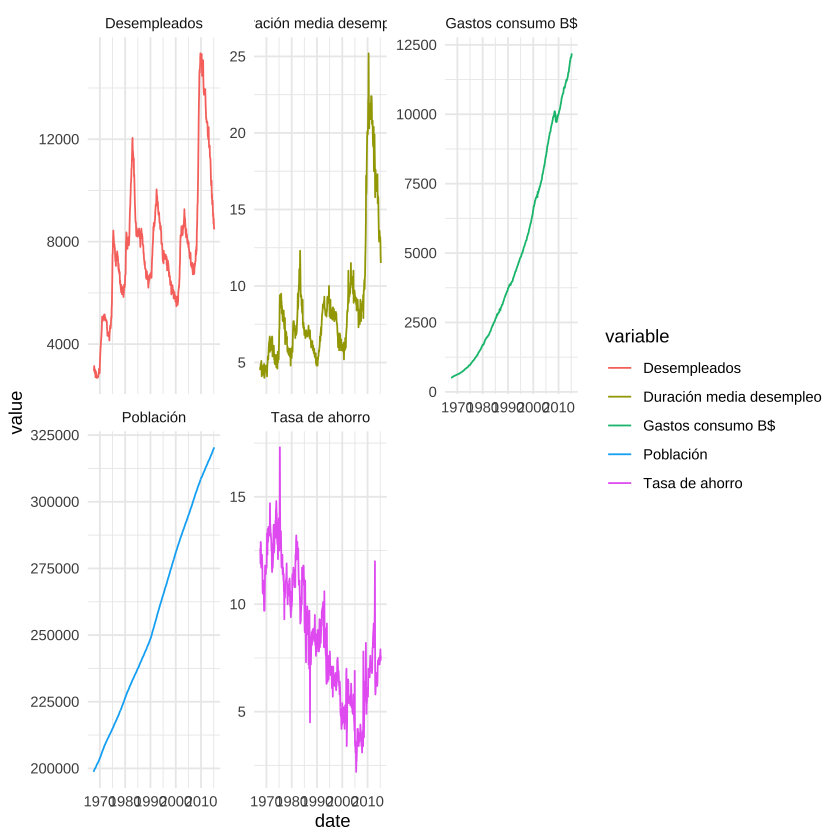

In [17]:
font_add_google('Oswald')
showtext_auto()

ggplot(economics_long) +
    aes(x = date, y = value, color = variable) +
    geom_line() +
    facet_wrap(vars(variable), scales = 'free_y') +
    theme_minimal()